# 1. Introducao
Projeto: Otimizacao de Campanhas de Marketing Digital

Objetivo: Avaliar a eficacia das campanhas de marketing digital e propor estrategias de otimizacao para melhorar o retorno sobre investimento (ROI).

Passos do projeto:<br>
-Exploracao e Limpeza de Dados<br>
-Analise Exploratoria de Dados (EDA)<br>
-Modelagem Preditiva<br>

Descricao do dataset:

Conjunto de dados simples de diferentes campanhas de marketing.

O número total de conversões mostra o número total de inscrições ou instalações, por exemplo, enquanto as conversões aprovadas informam quantos se tornaram usuários ativos reais.

Cortesia de Bunq.

O dataset foi disponibilizado no site www.kaggle.com

# 2. Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 3. Analisando Estrutura do dataset

In [2]:
df = pd.read_csv('C:/DataSets/Facebook.csv')

In [3]:
df.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


In [4]:
print(f'O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas')

O dataset possui 1143 linhas e 15 colunas


In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

quanti = df.select_dtypes(include = numerics)
quali = df.select_dtypes(exclude = numerics)

print(f'O dataset possui {quanti.shape[1]} colunas quantitativas e {quali.shape[1]} colunas qualitativas')

O dataset possui 9 colunas quantitativas e 6 colunas qualitativas


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   reporting_start      1143 non-null   object 
 2   reporting_end        1143 non-null   object 
 3   campaign_id          1143 non-null   object 
 4   fb_campaign_id       1143 non-null   object 
 5   age                  1143 non-null   object 
 6   gender               1143 non-null   object 
 7   interest1            1143 non-null   int64  
 8   interest2            1143 non-null   int64  
 9   interest3            1143 non-null   int64  
 10  impressions          1143 non-null   float64
 11  clicks               1143 non-null   int64  
 12  spent                1143 non-null   float64
 13  total_conversion     761 non-null    float64
 14  approved_conversion  761 non-null    float64
dtypes: float64(4), int64(5), object(6)
mem

In [7]:
df.isna().sum()

ad_id                    0
reporting_start          0
reporting_end            0
campaign_id              0
fb_campaign_id           0
age                      0
gender                   0
interest1                0
interest2                0
interest3                0
impressions              0
clicks                   0
spent                    0
total_conversion       382
approved_conversion    382
dtype: int64

In [8]:
df['total_conversion'].isnull().equals(df['total_conversion'].isnull() & df['approved_conversion'].isnull())

True

In [9]:
df[df['total_conversion'] == 0]

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
95,735033,18/08/2017,18/08/2017,936,108792,35-39,F,36,40,40,652.0,0,0.000000,0.0,0.0
184,747968,24/08/2017,24/08/2017,936,110962,35-39,F,21,27,24,512.0,0,0.000000,0.0,0.0
221,776476,21/08/2017,21/08/2017,936,115510,30-34,M,16,17,18,43756.0,5,5.440000,0.0,0.0
510,951853,29/08/2017,29/08/2017,936,123736,30-34,F,20,23,25,529.0,0,0.000000,0.0,0.0
655,1121352,29/08/2017,29/08/2017,1178,144582,35-39,M,25,30,29,368986.0,59,100.289999,0.0,0.0


In [10]:
df = df.dropna()

In [11]:
df['reporting_start'] = pd.to_datetime(df['reporting_start'], format = '%d/%m/%Y')

df['reporting_end'] = pd.to_datetime(df['reporting_end'], format = '%d/%m/%Y')

In [12]:
print(f'Agora o dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas')

Agora o dataset possui 761 linhas e 15 colunas


Tentei verificar se os dados ausentes na verdade seriam valores 0 mas como o dataset possui valores com 0 nas colunas que contem valores nulos eu preferi apenas deletar estas linhas e assim continuar o pojeto

In [13]:
df.describe()

,ad_id,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
count,7.610000e+02,761.000000,761.000000,761.000000,7.610000e+02,761.000000,761.000000,761.000000,761.000000
mean,8.956389e+05,25.473062,28.977661,28.984231,1.031716e+05,15.340342,25.782181,2.161629,0.768725
std,1.670937e+05,15.508898,15.607548,15.604816,2.462644e+05,32.715738,57.622334,4.062201,1.656445
min,7.087460e+05,2.000000,3.000000,3.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.480860e+05,16.000000,19.000000,19.000000,3.149000e+03,0.000000,0.000000,1.000000,0.000000
50%,7.811750e+05,22.000000,26.000000,25.000000,1.219300e+04,3.000000,3.580000,1.000000,0.000000
75%,1.121184e+06,29.000000,33.000000,33.000000,8.597000e+04,14.000000,23.210000,2.000000,1.000000
max,1.121593e+06,66.000000,72.000000,72.000000,3.052003e+06,340.000000,639.949998,60.000000,21.000000


# 4. Analise Exploratoria de Dados

## 4.1 Analise Univariada

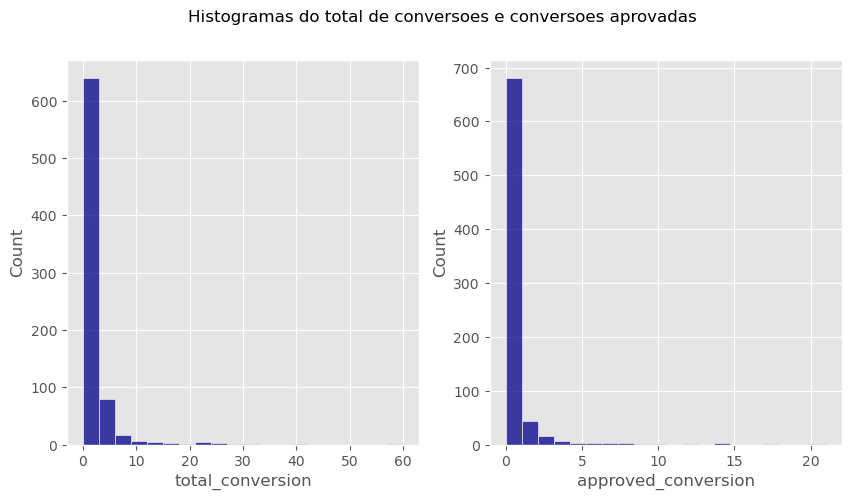

In [14]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

sns.histplot(x = 'total_conversion', bins = 20, data = df, ax = axs[0], color = {'darkblue'})

sns.histplot(x = 'approved_conversion', bins = 20, data = df, ax = axs[1], color = {'darkblue'})

plt.suptitle('Histogramas do total de conversoes e conversoes aprovadas')

plt.show()

In [15]:
max_impression = df['impressions'].max()

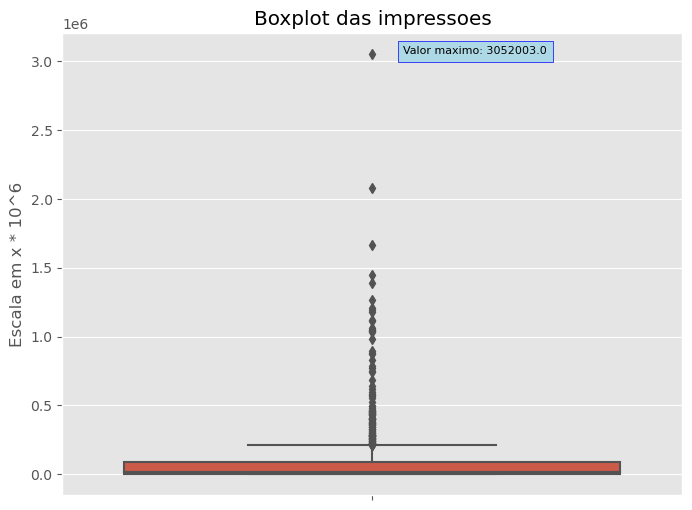

In [16]:
plt.figure(figsize = (8, 6))

sns.boxplot(y = 'impressions', data = df)
plt.title('Boxplot das impressoes')
plt.ylabel('Escala em x * 10^6')

plt.annotate(f'Valor maximo: {max_impression}',
            xy = (0, max_impression),
            xytext = (0.05, max_impression),
            bbox = dict(facecolor = 'lightblue', edgecolor = 'blue'),
            fontsize = 8)

plt.show()

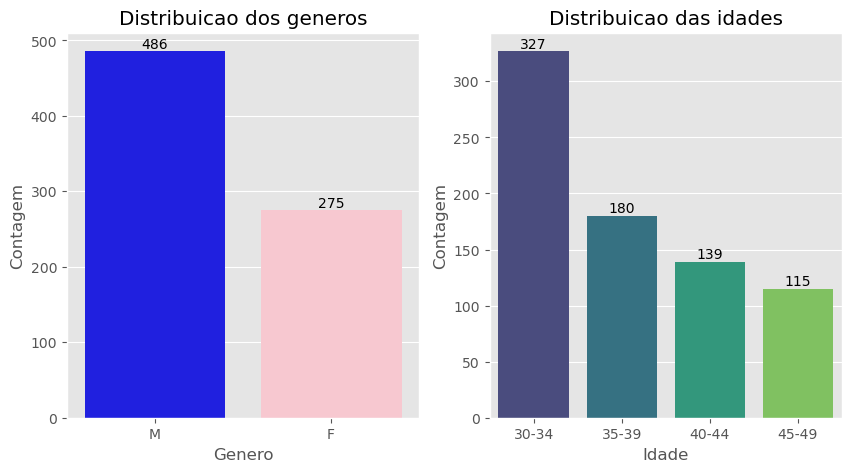

In [17]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

sns.barplot(x = df['gender'].value_counts().index, y = df['gender'].value_counts().values, palette = ['blue', 'pink'], ax = axs[0])
axs[0].set_title('Distribuicao dos generos')
axs[0].set_xlabel('Genero')
axs[0].set_ylabel('Contagem')

for i, v in enumerate(df['gender'].value_counts().values):
    axs[0].text(i, v, str(v), ha = 'center', va = 'bottom')

sns.barplot(x = df['age'].value_counts().index, y = df['age'].value_counts().values, palette = 'viridis', ax = axs[1])
axs[1].set_title('Distribuicao das idades')
axs[1].set_xlabel('Idade')
axs[1].set_ylabel('Contagem')

for i, v in enumerate(df['age'].value_counts().values):
    axs[1].text(i, v, str(v), ha = 'center', va = 'bottom')

plt.show()

## 4.2 Analise Bivariada

In [18]:
campaing_spent = df.groupby('campaign_id')['spent'].sum().reset_index()

campaign_impressions = df.groupby('campaign_id')['impressions'].sum().reset_index()

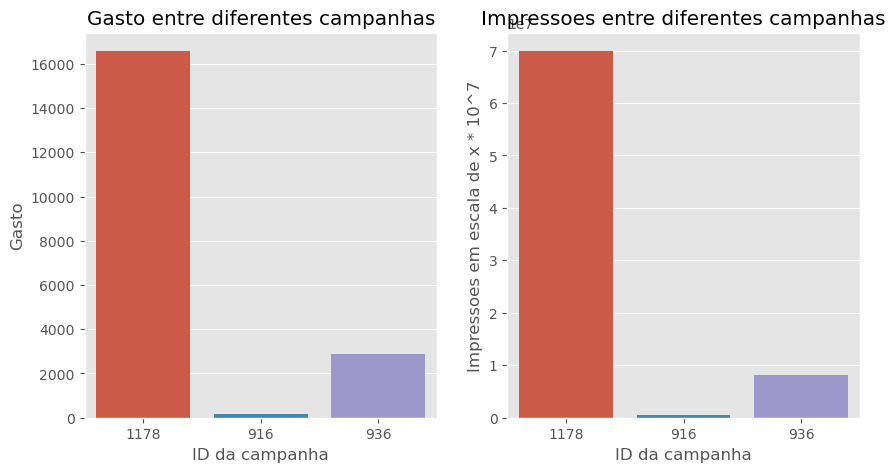

In [19]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

sns.barplot(x = 'campaign_id', y = 'spent', data = campaing_spent, ax = axs[0])
axs[0].set_title('Gasto entre diferentes campanhas')
axs[0].set_xlabel('ID da campanha')
axs[0].set_ylabel('Gasto')

sns.barplot(x = 'campaign_id', y = 'impressions', data = campaign_impressions, ax = axs[1])
axs[1].set_title('Impressoes entre diferentes campanhas')
axs[1].set_xlabel('ID da campanha')
axs[1].set_ylabel('Impressoes em escala de x * 10^7')

plt.show()

Estes dois ultimos graficos sao bem parecidos, ate mesmo porque usamos uma variavel em comum 'campaign_id', isso nos diz que a campanha que mais teve gastos foi a que teve o maior numero de impressoes

In [20]:
reporting_impressions = df.groupby('reporting_start')['impressions'].sum().reset_index()

max_reporting = reporting_impressions['impressions'].max()

max_date = reporting_impressions[reporting_impressions['impressions'] == max_reporting]['reporting_start'].values[0]

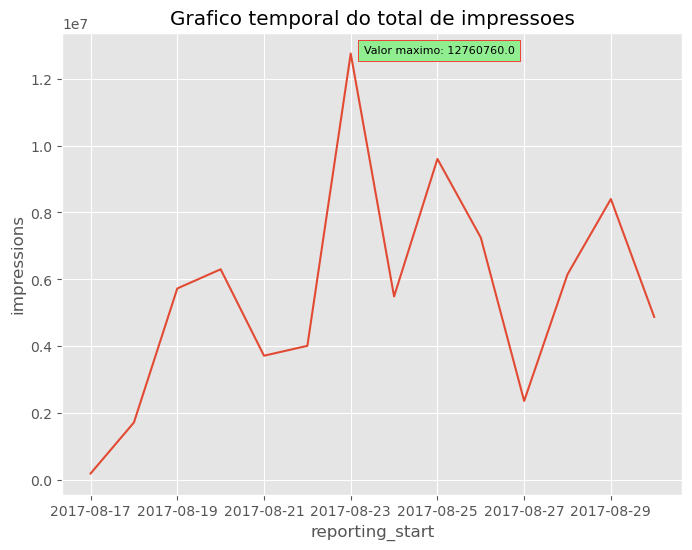

In [21]:
plt.figure(figsize = (8, 6))

sns.lineplot(x = 'reporting_start', y = 'impressions', data = reporting_impressions)
plt.title('Grafico temporal do total de impressoes')

plt.annotate(f'Valor maximo: {max_reporting}',
            xy = (max_date, max_reporting),
            xytext = (max_date + pd.DateOffset(days=0.3), max_reporting),
            bbox = dict(facecolor = 'lightgreen', edgecolor = 'red'),
            fontsize = 8)

plt.show()

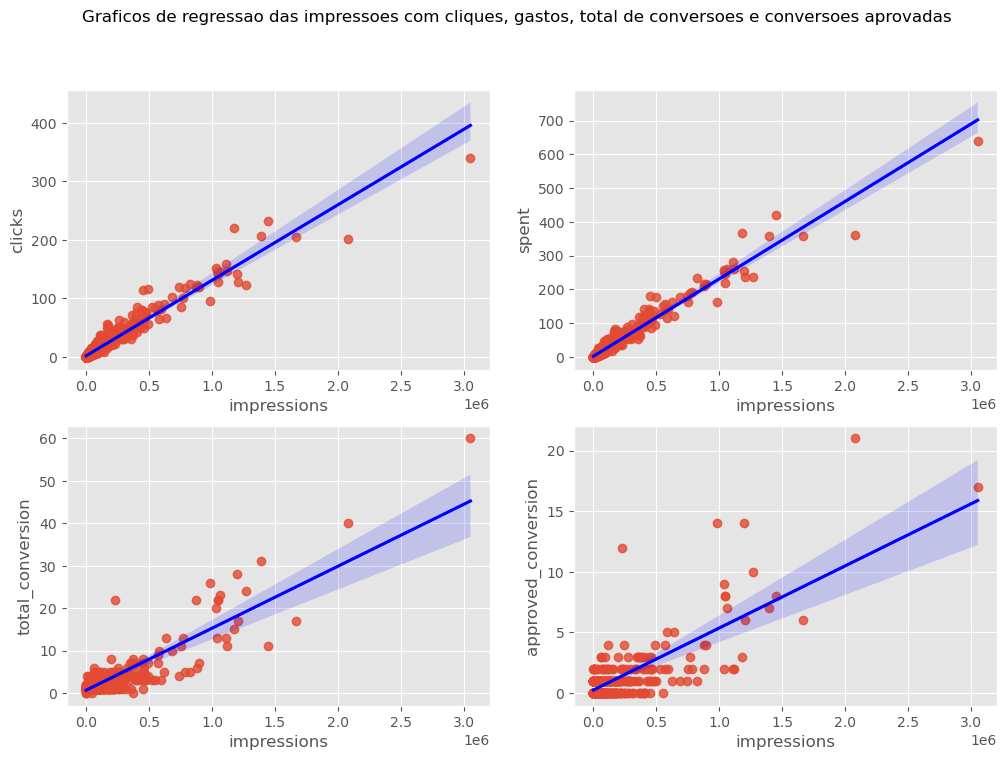

In [22]:
fig, axs = plt.subplots(2, 2, figsize = (12, 8))

sns.regplot(x = 'impressions', y = 'clicks', data = df, ax = axs[0][0], line_kws = {'color': 'blue'})

sns.regplot(x = 'impressions', y = 'spent', data = df, ax = axs[0][1], line_kws = {'color': 'blue'})

sns.regplot(x = 'impressions', y = 'total_conversion', data = df, ax = axs[1][0], line_kws = {'color': 'blue'})

sns.regplot(x = 'impressions', y = 'approved_conversion', data = df, ax = axs[1][1], line_kws = {'color': 'blue'})

plt.suptitle('Graficos de regressao das impressoes com cliques, gastos, total de conversoes e conversoes aprovadas')

plt.show()

## 4.3 Analise Multivariada

Vamos calcular algumas metricas como CTR (Click-Through Rate), CPC (Cost Per Click), CPA (Cost Per Acquisition), e ROI (Return on Investment).

Formulas:

CTR = clicks / impressions<br>
CPC = spent / clicks<br>
CPA = spent / total conversion<br>
ROI = (revenue - spent) / spent<br>

CTR: Calcula a taxa de cliques.<br>
CPC: Calcula o custo por clique e trata divisoes por zero.<br>
CPA: Calcula o custo por aquisicao e trata divisoes por zero.<br>
Revenue: Calcula a receita assumindo um valor monetario fixo para cada conversao aprovada.<br>
ROI: Calcula o retorno sobre investimento e trata divisoes por zero.<br>

No nosso dataset, nao temos uma coluna de Revenue entao para o proposito deste projeto, vamos assumir que approved_conversion representa uma metrica importante de sucesso e que podemos atribuir um valor monetario fixo para cada approved_conversion. Vamos assumir que cada approved_conversion vale $100.

In [23]:
df['revenue'] = df['approved_conversion'] * 100

In [24]:
df = df[df['total_conversion'] != 0]

In [25]:
df['CTR'] = df['clicks'] / df['impressions']

df['CPC'] = df['spent'] / df['clicks']

df['CPA'] =  df['spent'] / df['total_conversion']

df['ROI'] = (df['revenue'] - df['spent']) / df['spent']

In [26]:
df = df.dropna()

In [27]:
metrics = df[['CTR', 'CPC', 'CPA', 'ROI']]

In [28]:
metrics.describe()

,CTR,CPC,CPA,ROI
count,556.000000,556.000000,556.000000,556.000000
mean,0.000211,1.504165,12.666041,11.305851
std,0.000111,0.284270,16.269945,33.681458
min,0.000031,0.180000,0.180000,-1.000000
25%,0.000134,1.363214,2.243750,-1.000000
50%,0.000182,1.540000,6.738333,-0.410449
75%,0.000270,1.703045,16.485833,7.325943
max,0.001059,2.212000,180.220001,554.555534


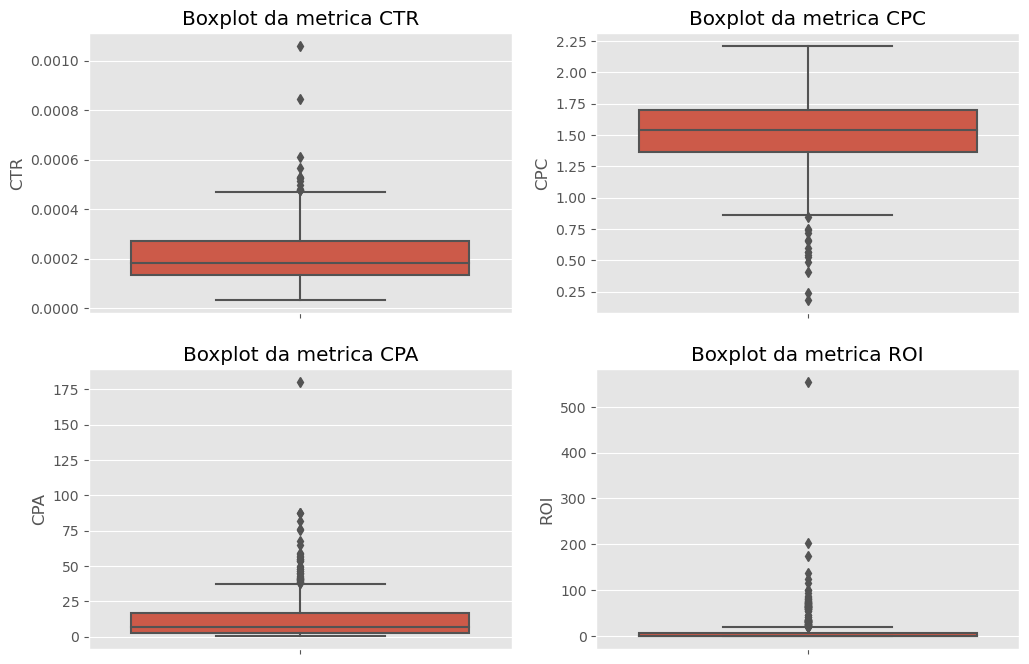

In [29]:
fig, axs = plt.subplots(2, 2, figsize = (12, 8))

for i in enumerate(metrics):
    
    sns.boxplot(y = metrics[i[1]], ax = axs[i[0] // 2][i[0] % 2])
    axs[i[0] // 2][i[0] % 2].set_title(f'Boxplot da metrica {i[1]}')

plt.show()

Obtivemos uma media do CTR extremamente baixa de 0.0211% sendo que uma CTR saudavel mede em torno de 1% a 3%, isso significa que os anuncios nao sao chamativos o suficiente ou que o publico alvo nao esta bem segmentado. A media do CPC foi de  1.50 dolares nao consigo dizer se e uma media boa pois varia muito de empresa para empresa seria necessario comparar este valor com benchmarks da industria. O CPA teve uma media de 12.66 dolares quem vai dizer se esta media esta boa e o valor de conversao, se o CPA estiver dentro do orcamento e o valor de conversao e alto, pode ser aceitavel. O ROI esta com uma media excelente de 1130.58% isso indica que a cada dolar que investimos obtemos um retorno de 11.31 dolares isso significa que nossas campanhas estao gerendo um lucro significativo, porem mais de 50% do dados de ROI estao negativos se abaixarmos esta taxa nosso lucro aumentara exponencialmente.

In [30]:
campaign_metrics = df.groupby('campaign_id')[['CTR', 'CPC', 'CPA', 'ROI']].mean().reset_index()

In [31]:
campaign_metrics

,campaign_id,CTR,CPC,CPA,ROI
0,1178,0.000133,1.700655,19.762613,2.820966
1,916,0.000278,1.330350,4.148714,18.428626
2,936,0.000266,1.365158,7.918684,17.355210


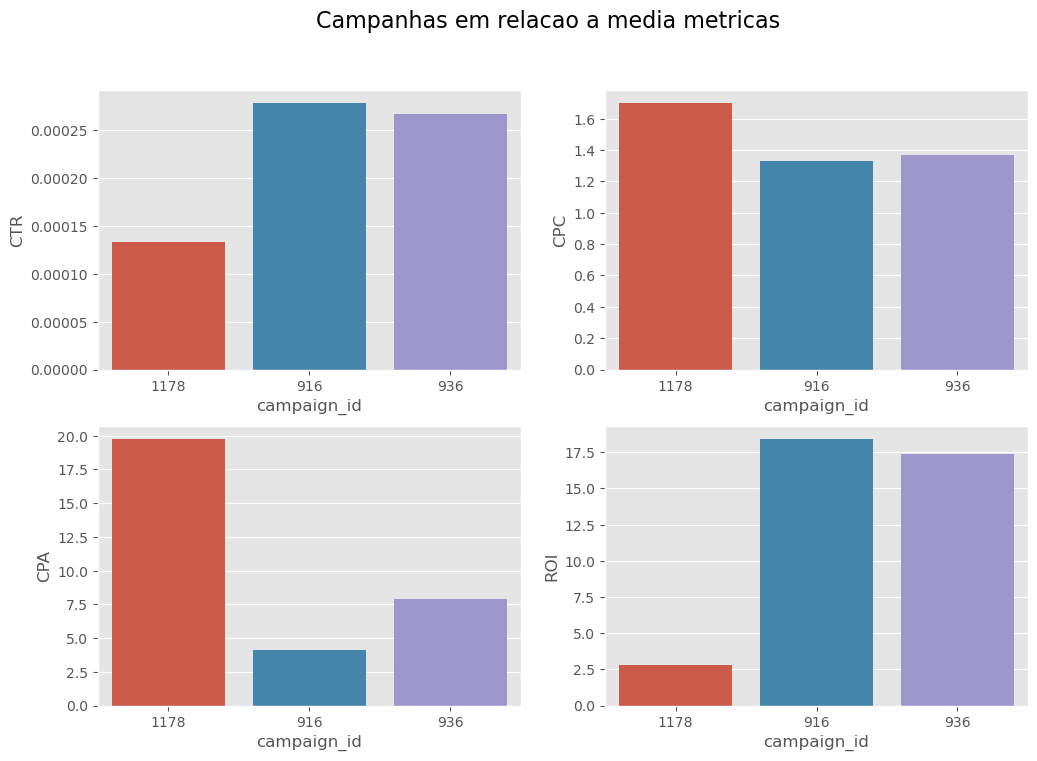

In [32]:
fig, axs = plt.subplots(2, 2, figsize = (12, 8))

sns.barplot(x = 'campaign_id', y = 'CTR', data = campaign_metrics, ax = axs[0][0])

sns.barplot(x = 'campaign_id', y = 'CPC', data = campaign_metrics, ax = axs[0][1])

sns.barplot(x = 'campaign_id', y = 'CPA', data = campaign_metrics, ax = axs[1][0])

sns.barplot(x = 'campaign_id', y = 'ROI', data = campaign_metrics, ax = axs[1][1])

plt.suptitle('Campanhas em relacao a media metricas', fontsize = 16)

plt.show()

In [33]:
age_metrics = df.groupby('age')[['CTR', 'CPC', 'CPA', 'ROI']].mean().reset_index()

In [34]:
age_metrics

,age,CTR,CPC,CPA,ROI
0,30-34,0.000171,1.505738,8.056747,12.719169
1,35-39,0.000198,1.541919,13.005533,11.050666
2,40-44,0.000232,1.500203,17.903411,5.976760
3,45-49,0.000301,1.444010,16.307630,15.400111


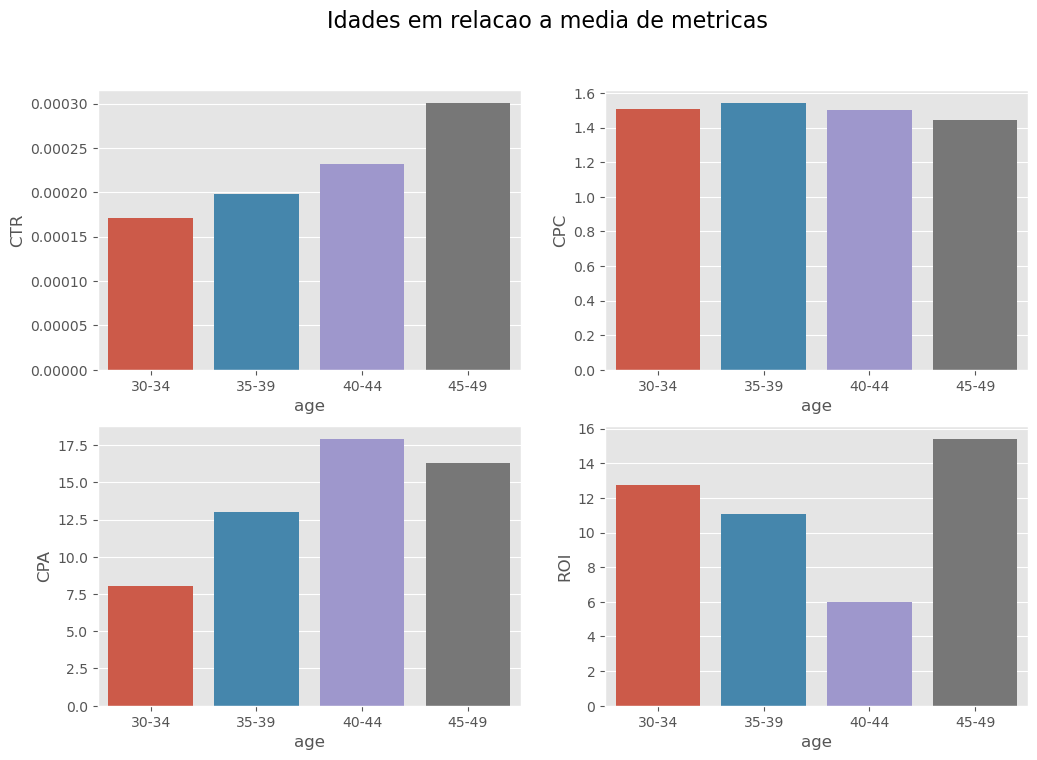

In [35]:
fig, axs = plt.subplots(2, 2, figsize = (12, 8))

sns.barplot(x = 'age', y = 'CTR', data = age_metrics, ax = axs[0][0])

sns.barplot(x = 'age', y = 'CPC', data = age_metrics, ax = axs[0][1])

sns.barplot(x = 'age', y = 'CPA', data = age_metrics, ax = axs[1][0])

sns.barplot(x = 'age', y = 'ROI', data = age_metrics, ax = axs[1][1])

plt.suptitle('Idades em relacao a media de metricas', fontsize = 16)

plt.show()

In [36]:
gender_metrics = df.groupby('gender')[['CTR', 'CPC', 'CPA', 'ROI']].mean().reset_index()

In [37]:
gender_metrics

,gender,CTR,CPC,CPA,ROI
0,F,0.000274,1.380547,10.029323,12.503655
1,M,0.000178,1.568853,14.045803,10.679055


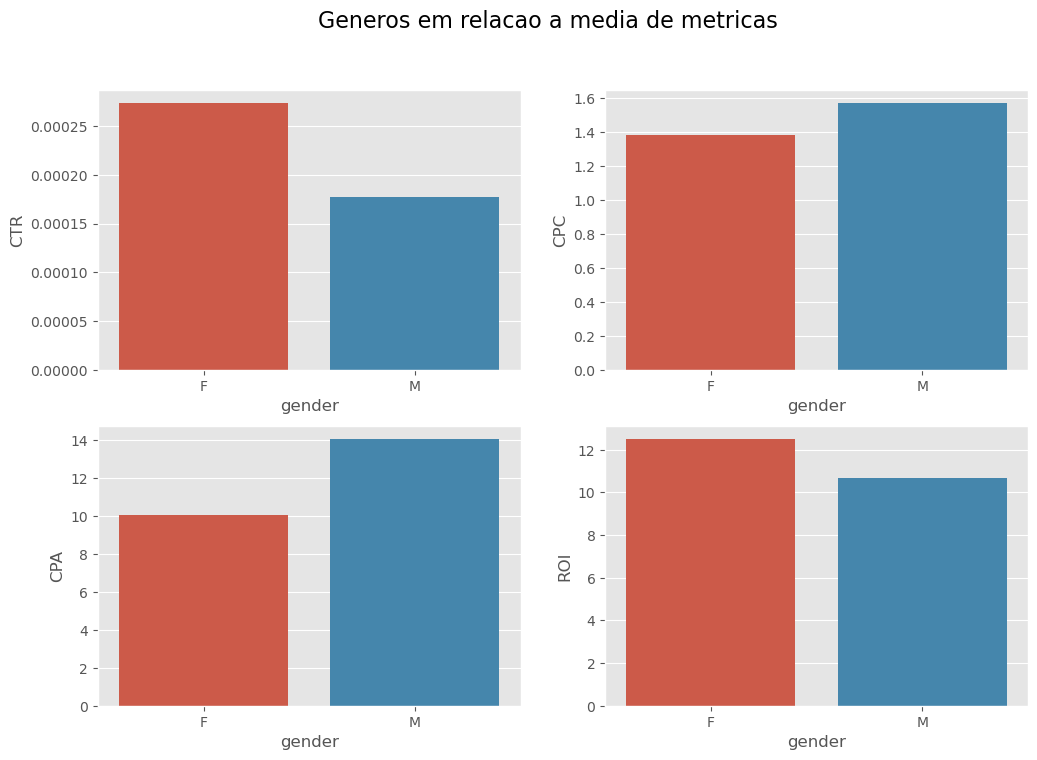

In [38]:
fig, axs = plt.subplots(2, 2, figsize = (12, 8))

sns.barplot(x = 'gender', y = 'CTR', data = gender_metrics, ax = axs[0][0])

sns.barplot(x = 'gender', y = 'CPC', data = gender_metrics, ax = axs[0][1])

sns.barplot(x = 'gender', y = 'CPA', data = gender_metrics, ax = axs[1][0])

sns.barplot(x = 'gender', y = 'ROI', data = gender_metrics, ax = axs[1][1])

plt.suptitle('Generos em relacao a media de metricas', fontsize = 16)

plt.show()

In [39]:
corr = df.corr()

In [40]:
corr[['impressions', 'total_conversion']]

,impressions,total_conversion
ad_id,0.456018,0.327241
interest1,-0.082825,-0.086654
interest2,-0.079314,-0.084961
interest3,-0.079143,-0.083615
impressions,1.000000,0.885839
clicks,0.969014,0.806986
spent,0.978919,0.824250
total_conversion,0.885839,1.000000
approved_conversion,0.769690,0.889236
revenue,0.769690,0.889236


# 5. Modelagem Preditiva

## 5.1 Predicao de Impressoes

In [41]:
X = np.array(df[['clicks', 'spent']])

y = np.array(df['impressions'])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [43]:
modelLG = LinearRegression()

In [44]:
modelLG.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = modelLG.predict(X_test)

In [46]:
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

In [47]:
modelLG.score(X_test, y_test)

0.9667103109757786

In [48]:
print("Erro Quadrático Médio (MSE):", mse)
print("Coeficiente de Determinação (R²):", r2)

Erro Quadrático Médio (MSE): 4176723205.68131
Coeficiente de Determinação (R²): 0.9667103109757786


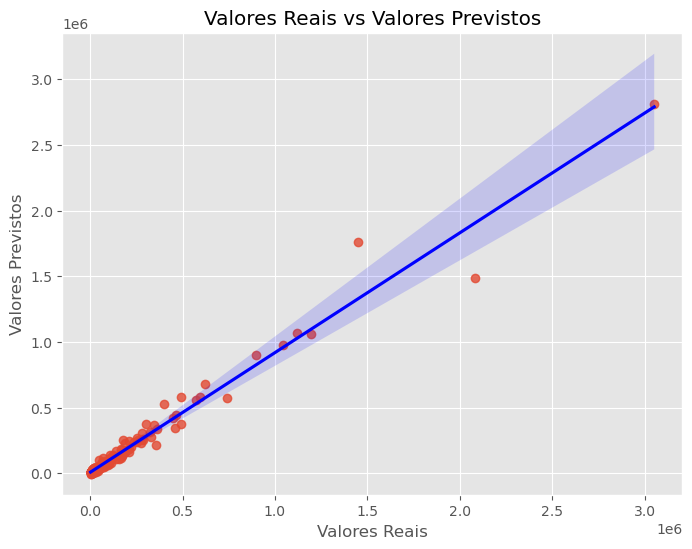

In [49]:
plt.figure(figsize=(8, 6))

sns.regplot(x=y_test, y=y_pred, line_kws = {'color': 'blue'})
plt.title("Valores Reais vs Valores Previstos")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")

plt.show()

In [50]:
residuals = y_test - y_pred

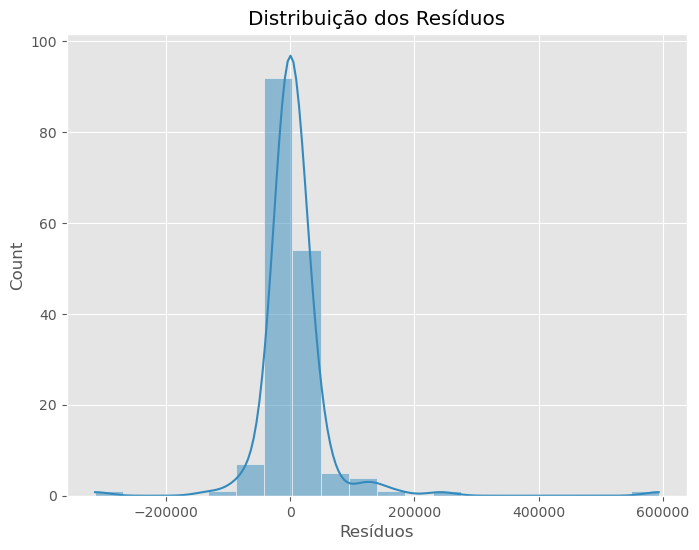

In [51]:
plt.figure(figsize=(8, 6))

sns.histplot(residuals, bins=20, kde=True)
plt.title("Distribuição dos Resíduos")
plt.xlabel("Resíduos")

plt.show()

## 5.2 Predicao de total de conversoes

In [52]:
X = np.array(df[['impressions', 'clicks', 'spent']])

y = np.array(df['total_conversion'])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [54]:
modelLG = LinearRegression()

In [55]:
modelLG.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred = modelLG.predict(X_test)

In [57]:
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

In [58]:
modelLG.score(X_test, y_test)

0.8237097620998837

In [59]:
print("Erro Quadrático Médio (MSE):", mse)
print("Coeficiente de Determinação (R²):", r2)

Erro Quadrático Médio (MSE): 3.1451584262633183
Coeficiente de Determinação (R²): 0.8237097620998837


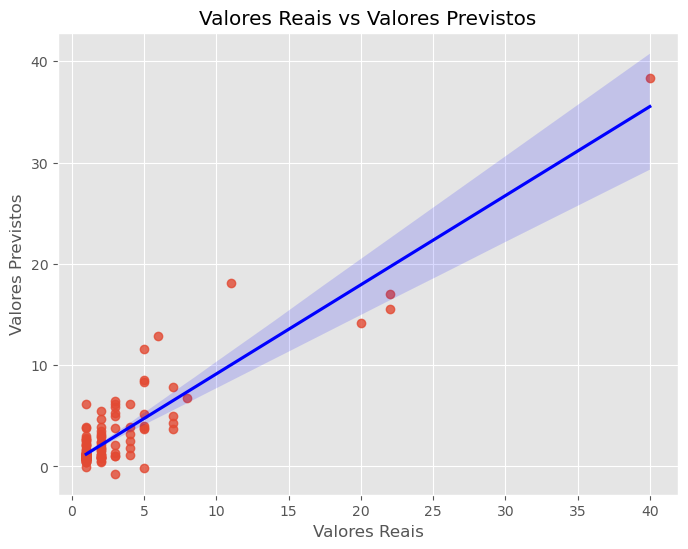

In [60]:
plt.figure(figsize=(8, 6))

sns.regplot(x=y_test, y=y_pred, line_kws = {'color': 'blue'})
plt.title("Valores Reais vs Valores Previstos")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")

plt.show()

In [61]:
residuals = y_test - y_pred

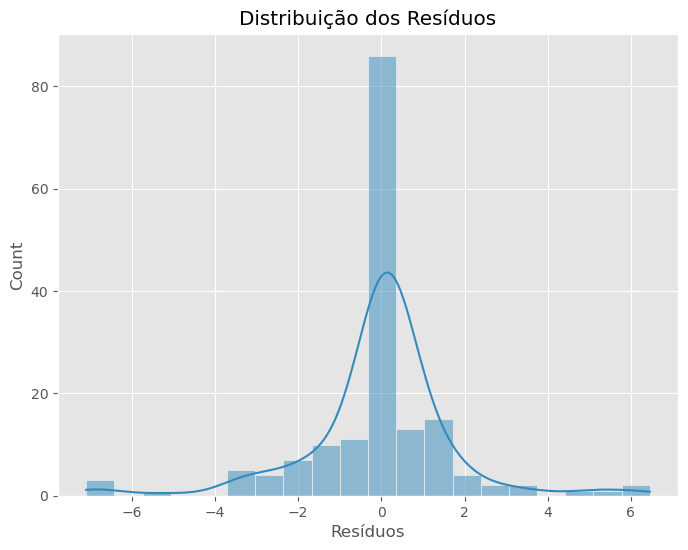

In [62]:
plt.figure(figsize=(8, 6))

sns.histplot(residuals, bins=20, kde=True)
plt.title("Distribuição dos Resíduos")
plt.xlabel("Resíduos")

plt.show()

Obtivemos modelos muito promissores, nosso algoritmo para prever impressoes teve 96,75% de acuracia e a predicao de conversoes teve 84,40% de acuracia utilazando Linear Regression em ambos